In [214]:
# Import some stuff
import numpy as np 
from scipy.special import erf
import numpy.random as rn
import matplotlib
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
%matplotlib inline  
%pylab inline 
import seaborn as sns; sns.set()
rcParams['font.family'] = 'serif'

plot_pretty()

Populating the interactive namespace from numpy and matplotlib


# Problem 

Salpeter parametrized the initial mass function as:

\begin{equation}
f(x) \propto  x^{-\gamma}
\end{equation}

where $x = m_\star /m_\odot, \,\,\, 0.5\leq x \leq 10$ and $\gamma \cong 2.35$.

We want to estimate how many stars, $N_\star$ we need to observe in order to measure $\gamma$ with relative uncertainty $2 \%$.

Before doing anything else, let us first normalize $f(x)$. Let $f(x) = Ax^{-\gamma}$. Requiring the integral over the $x$-range to be unity, we get:

\begin{equation}
\int f(x) dx = 1 \Rightarrow A\int_{x_0}^{x_1} x^{-\gamma} dx =1 \Rightarrow \frac{1}{1-\gamma}A(x_1^{1-\gamma}- x_0^{1-\gamma}) =1 \Rightarrow
\end{equation}

\begin{equation}
\Rightarrow \boxed{A = \frac{1-\gamma}{x_1^{1-\gamma}- x_0^{1-\gamma}}},
\end{equation}

with $x_0 = 0.5$ and $x_1 = 10$, and fiducial value for $\gamma$ when need to evaluate it $\gamma \cong 2.35$.

So write now the pdf as $f(x) = A(\gamma)x^{-\gamma}$, where we explicitly denote that the normalization constant depends on $\gamma$.

To find the number of stars required, I will use the magic formula #2. This expresses the Cramer-Rao bound:

\begin{equation}
\boxed{
\mbox{Var}(\gamma) = \sigma_\gamma^2 \geq \frac{1}{N_\star I(\gamma)},}
\end{equation}

where:

\begin{equation}
\boxed{
I(\gamma) = \int \frac{1}{f}\left( \frac{\partial f}{\partial \gamma}\right)^2 dx}
\end{equation}

We proceed to calculate $I(\gamma)$. Useful formula for derivatives: $\frac{\partial}{\partial x}\alpha^x = \ln\alpha \,\alpha^x$.

Using the above formula, we have:
\begin{equation}
\frac{\partial}{\partial \gamma}f(x) = \left[A'(\gamma) - A(\gamma)\ln x\right]x^{-\gamma}
\end{equation}

Where $A'(\gamma) = \frac{\partial}{\partial \gamma}A(\gamma)$. Now, dropping the explic dependence on $\gamma$ from $A$ and $A'$, we can write $I$, using the above result, as:

\begin{eqnarray}
I(\gamma)& = &\int_{x_0}^{x_1} \frac{1}{A}\left[A^{' \,2} -2AA'\ln x + A^2\ln^2 x \right]x^{-\gamma} dx \Rightarrow\\
\Rightarrow I(\gamma) & = & \frac{A^{' \,2}}{A}\hat{I}_1(\gamma) -2A'\hat{I}_2(\gamma) + A\hat{I}_3(\gamma), 
\end{eqnarray}

where:
\begin{eqnarray}
\hat{I}_1(\gamma) & = & \int_{x_0}^{x_1} x^{-\gamma} dx \\
\hat{I}_2(\gamma) & = & \int_{x_0}^{x_1} \ln x \,x^{-\gamma} dx \\
\hat{I}_3(\gamma) & = & \int_{x_0}^{x_1} \ln^2 x\, x^{-\gamma} dx
\end{eqnarray}

Let's try to calculate the integrals now:

By definition of the normalization constant (see above), we have:
\begin{equation}
\boxed{\hat{I}_1(\gamma) = \frac{1}{A}}
\end{equation}

Performing the other two integrals, we arrive at:
\begin{equation}
\boxed{
\hat{I}_2(\gamma) = \frac{1}{1-\gamma}\left( \left.x^{1-\gamma}\,\ln x \right|_{x_0}^{x_1} -\frac{1}{A}\right),}
\end{equation}

where $\left.x^{1-\gamma} \ln x \right|_{x_0}^{x_1} \equiv x_1^{1-\gamma} \ln x_1 - x_0^{1-\gamma} \ln x_0$.

And:
\begin{equation}
\boxed{
\hat{I}_3(\gamma) = \frac{1}{1 - \gamma} \left(\left.x^{1-\gamma}\ln^2x\right|_{x_0}^{x_1} - \frac{2}{1-\gamma}  \left.x^{1-\gamma}\ln x\right|_{x_0}^{x_1} + \frac{2}{1-\gamma}\frac{1}{A}\right)}
\end{equation}

We have now to calculate $A'$ and then evaluate everything.

\begin{equation}
A(\gamma) = \frac{1-\gamma}{x_1^{1 - \gamma} - x_0^{1 - \gamma}} \Rightarrow A' = - \frac{1}{x_1^{1 - \gamma} - x_0^{1 - \gamma}} + (1 - \gamma)\frac{\partial}{\partial \gamma}\left(\frac{1}{x_1^{1 - \gamma} - x_0^{1 - \gamma}} \right) \Rightarrow 
\end{equation}

\begin{equation}
\Rightarrow \dots \Rightarrow \boxed{A'(\gamma) = - \frac{1}{x_1^{1 - \gamma} - x_0^{1 - \gamma}} +\frac{1-\gamma}{\left(x_1^{1 - \gamma} - x_0^{1 - \gamma} \right)^2}\left. x^{1-\gamma}\ln x \right|_{x_0}^{x_1}}
\end{equation}

Now, let's use $x_0 = 0.5, x_1 = 10.0$ and $\gamma = 2.35$ to evaluate everything.

We have:

\begin{eqnarray}
x_1^{1 - \gamma} - x_0^{1-\gamma} \cong - 2.504\\
\left.x^{1-\gamma}\ln x\right|_{x_0}^{x_1} \cong 1.8698\\
\left.x^{1-\gamma}\ln^2 x\right|_{x_0}^{x_1} = -0.9879\\
\end{eqnarray}

And then using these:

\begin{eqnarray}
A \cong 0.539 \\
A' \cong -0.003226
\end{eqnarray}

And then:
\begin{eqnarray}
\hat{I}_1 \cong 1.8553 \\
\hat{I}_2 \cong - 0.0107 \\
\hat{I}_3 \cong 0.7158
\end{eqnarray}

Putting everything together, we have:
\begin{equation}
\boxed{
I_{\gamma = 2.35} = 0.3852}
\end{equation}

Using the Cramer-Rao bound formula, we have (in the limit where we consider the equality sign):

\begin{equation}
N_\star = \frac{1}{\sigma_\gamma^2 I(\gamma)}
\end{equation}

Since we want to find the $N_\star$ in order to measure $\sigma_\gamma$ with relative uncertainty $2 \%$, we take: 
\begin{equation}
\sigma_\gamma = 0.02\times2.35 = 0.047
\end{equation}

Putting everything together we have:

\begin{equation}
N_\star = \frac{1}{(0.047^2)\times 0.3852}\,\, \Rightarrow\,\, \boxed{N_\star \cong 1175 \,\,\,\mbox{stars}} 
\end{equation}

We need to observe approximately $1175$ stars to achieve a $2\%$ accuracy in the determination of $\gamma$.

# Problem

To apply the inverse transform method, we have to calculate the C.D.F. of $f(x)$, $F(x)$. This is:

\begin{equation}
F(x) = \int_{x_0}^{x} f(x') dx' = \int_{x_0}^x A(\gamma) (x')^{-\gamma}dx' = \frac{A(\gamma)}{1 - \gamma}\left(x^{1-\gamma} - x_0^{1-\gamma} \right)
\end{equation}

Using the form of $A(\gamma)$ from the previous problem, we arrive at:

\begin{equation}
\boxed{
F(x)= \frac{x^{1-\gamma} - x_0^{1-\gamma}}{x_1^{1-\gamma} - x_0^{1-\gamma}}
}
\end{equation}

With $x_0 = 0.5, x_1 = 10$ and $\gamma = 2.35$, as before.

Now, lets invert the above. Set $F(x) = u$ for conveniene. Then:

\begin{equation}
x^{1-\gamma} - x_0^{1-\gamma} = u\left(x_1^{1-\gamma} - x_0^{1-\gamma}\right) \Rightarrow x^{1-\gamma} = x_0^{1-\gamma} + u\left(x_1^{1-\gamma} - x_0^{1-\gamma}\right) \Rightarrow 
\end{equation}

\begin{equation}
\Rightarrow \boxed{ x = \left[ x_0^{1-\gamma} + u\left(x_1^{1-\gamma} - x_0^{1-\gamma}\right) \right]^{\frac{1}{1-\gamma}}}
\end{equation} 

So, to generate random numbers $x_i$ according to the p.d.f $f(x)$, we draw random numbers $u_i$ from the uniform distribution $U(0,1)$ and then use the above formula to compute $x_i$.


In [215]:
# Inverse transform function 
def salpeter_imf_rand(u, x_0, x_1, gamma):
    """
    This is a function that gets as inputs:
    - A random number / or array of random numbers, u,
    uniformly distributed in the interval (0,1) 
    - The limits of the interval where the p.d.f is defined
    x_0, x_1
    - The value of the power law, gamma 
    
    And returns a random number / array of random numbers
    distributed according to the salpeter pdf
    """
    
    #define the exponential 1-g - It is everywhere
    exp = 1.0 - gamma
    #Define the inverse exponential
    invexp = 1.0/exp
    
    x = (x_0**exp + u*(x_1**exp - x_0**exp))**invexp
    
    return x

In [216]:
# Define the values of parameters here and get 1175 values of x

#Parameters
x_0 = 0.5
x_1 = 10.0
gamma = 2.35
N_star = 1175

# Get N_star values, uniformly distributed between 0 and 1 
u = rn.random(N_star)

#transform them to x_values, distributed according to the Salpeter IMF

x_random = salpeter_imf_rand(u, x_0, x_1, gamma)

In the following plot, we present the  binned simulated data, as well as the Salpeter IMF for $\gamma = 2.35$.  

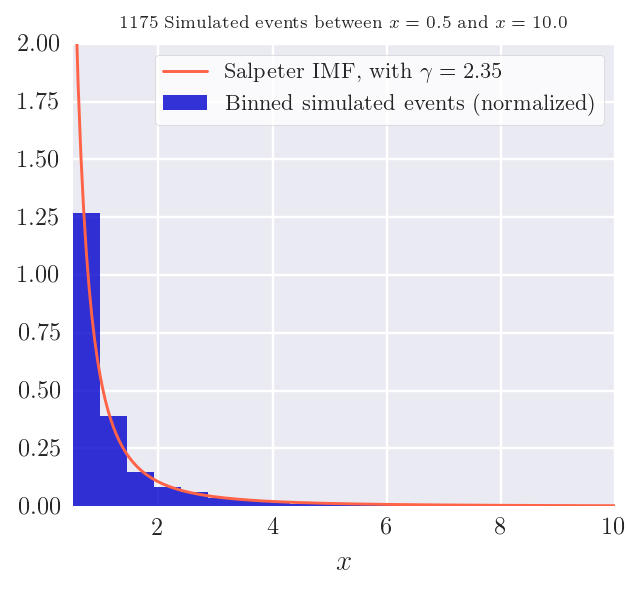

In [217]:
x_theor = np.linspace(0.5,10.0,200)
f_theor = 0.539*(x_theor**(-gamma))


plot_pretty()
fig = plt.figure(figsize = (4,3.5))

plt.hist(x_random, bins=20, range=(x_0,x_1), color='mediumblue', alpha=0.8, normed=True, label='Binned simulated events (normalized)')
plt.plot(x_theor, f_theor, c='tomato', linewidth = 1.2, label=r'Salpeter IMF, with $\gamma = 2.35$')

plt.xlim(0.5,10.0);plt.ylim(0.0,2.0)
plt.xlabel('$x$', fontsize=12)
plt.title('1175 Simulated events between $x=0.5$ and $x=10.0$', fontsize=7)

plt.legend(frameon=True, loc='upper right', fontsize=9, facecolor='w')
plt.show()

## Weighted least squares

To find the best fit parameter $\gamma$, I have to minimize the function:

\begin{equation}
X^2 = \sum_{i=1}^{20} \frac{1}{\sigma_i^2}(y_i - f(x_i;\gamma))^2
\end{equation}

Where $\sigma_i^2 = f(x_i;\gamma)$ (assuming Poisson process). This can also be approximated by $\sigma_i^2 \cong y_i$. In our case, $y_i = n_i$ the (normalized) counts in the bin. Also we are not going to use the approximation for $\sigma$, since in some bins we have just a few events (or no events at all). 

The error is calculated from the covariance matrix $V_{ij} = \frac{\partial^2 X^2}{\partial \gamma^2}$ that has one parameter in our case.

In [218]:
# Calculate the number of events at each bin and the limits of the bins
n_im, bin_lim = np.histogram(x_random, bins=20, range=(x_0,x_1), density=True)

#Calculate the midpoints
x_mid = np.zeros(20)

for i in range(20):
    x_mid[i] = 0.5*(bin_lim[i]+bin_lim[i+1])

Now define a function that calculates $f(x)$ for a given parameter $\gamma$ ($x_0$ and $x_1$ are not being varied) and $\sigma^2$ at the midpoints:

In [219]:
def func_x(x, gamma):
    """
    Calculate the (normalized) salpeter IMF 
    for any parameter gamma
    """
    ex_g = 1.0 - gamma
    norm_A = ex_g/(x_1**ex_g - x_0**ex_g)
    fun = norm_A*(x**(-gamma))
    
    return fun

# =============================================
# Now calculate the sigma 

sig = np.sqrt(func_x(x_mid, gamma))

In [220]:
from scipy.optimize import curve_fit

gamma_0 = 2.0 #Initial guess for gamma

# Calculate the best fit parameter and the error 
opt_gam, cov_gam = curve_fit(func_x, x_mid, n_im, p0=gamma_0, sigma=sig, absolute_sigma=True)

print(opt_gam)
      
print(np.sqrt(np.diag(cov_gam)))

[2.44614493]
[1.35895037]


From the above, we see that...

# Problem

In [221]:
# First simulate 10^5 events
N_stars = int(1e5)

#Get N_stars random values from a homogeneous distribution (0,1)
u = rn.random(N_stars)

#transform them to x_values, distributed according to the Salpeter IMF

x_random = salpeter_imf_rand(u, x_0, x_1, gamma)

Let's plot the histograms now

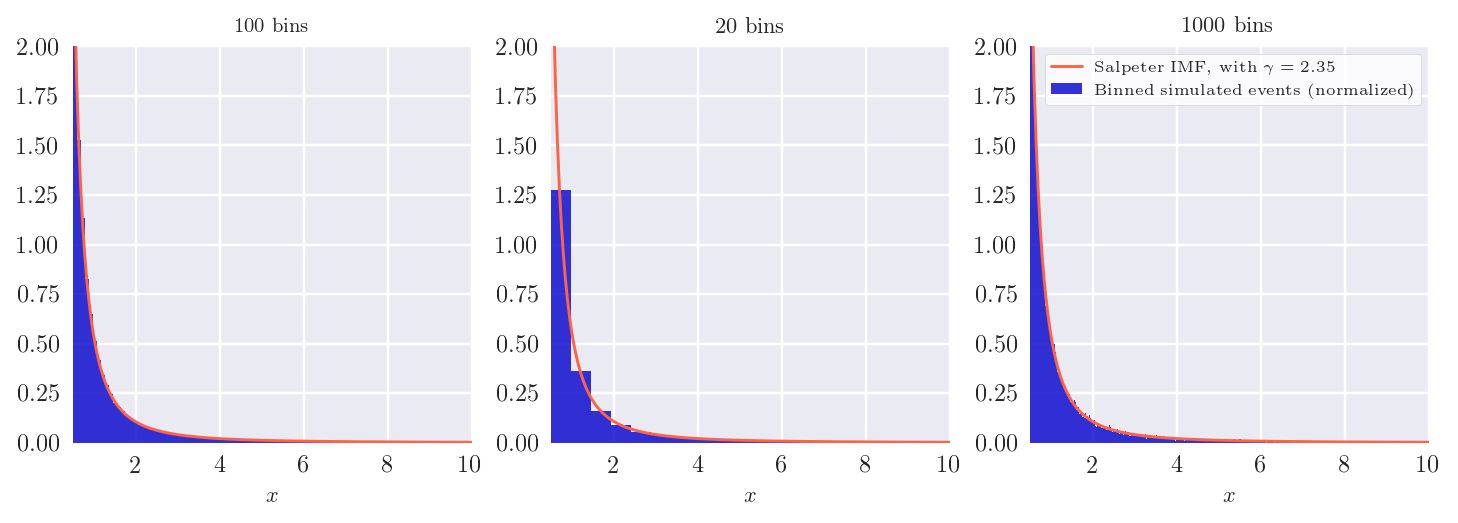

In [222]:
fig, ax = plt.subplots(1, 3, figsize = (10,3))

ax[0].hist(x_random, bins=100, range=(x_0,x_1), color='mediumblue', alpha=0.8, normed=True, label='Binned simulated events (normalized)')
ax[0].plot(x_theor, f_theor, c='tomato', linewidth = 1.2, label=r'Salpeter IMF, with $\gamma = 2.35$')
ax[0].set_xlim(0.5,10.0);ax[0].set_ylim(0.0,2.0)
ax[0].set_xlabel('$x$', fontsize=9)
ax[0].set_title('100 bins', fontsize=8)

ax[1].hist(x_random, bins=20, range=(x_0,x_1), color='mediumblue', alpha=0.8, normed=True, label='Binned simulated events (normalized)')
ax[1].plot(x_theor, f_theor, c='tomato', linewidth = 1.2, label=r'Salpeter IMF, with $\gamma = 2.35$')
ax[1].set_xlim(0.5,10.0);ax[1].set_ylim(0.0,2.0)
ax[1].set_xlabel('$x$', fontsize=9)
ax[1].set_title('20 bins', fontsize=9)


ax[2].hist(x_random, bins=1000, range=(x_0,x_1), color='mediumblue', alpha=0.8, normed=True, label='Binned simulated events (normalized)')
ax[2].plot(x_theor, f_theor, c='tomato', linewidth = 1.2, label=r'Salpeter IMF, with $\gamma = 2.35$')
ax[2].set_xlim(0.5,10.0);ax[2].set_ylim(0.0,2.0)
ax[2].set_xlabel('$x$', fontsize=9)
ax[2].set_title('1000 bins', fontsize=9)

plt.legend(frameon=True, loc='upper right', fontsize=6.5, facecolor='w')
plt.show()

## Fit with non-linear least squares

I perform a fit of the three above histograms with non-linear least squares:

\begin{equation}
\left[\frac{y_i -f(x_i)}{\sigma_i} \right]^2
\end{equation}

For the uncertainty now I adopt $\sigma_i = \sqrt(y_i)$, where $y_i$ the number of events in the bin $i$.

In [223]:
# Calculate the number of events at each bin and the limits of the bins 
# For the three cases
# ====================================================================

#Case one - 100 bins
n_im_1, bin_lim_1 = np.histogram(x_random, bins=100, range=(x_0,x_1), density=True)

#Calculate the midpoints
x_mid_1 = np.zeros(100)

for i in range(100):
    x_mid_1[i] = 0.5*(bin_lim_1[i]+bin_lim_1[i+1])

#====================================================================
#Case two - 20 bins
n_im_2, bin_lim_2 = np.histogram(x_random, bins=20, range=(x_0,x_1), density=True)

#Calculate the midpoints
x_mid_2 = np.zeros(20)

for i in range(20):
    x_mid_2[i] = 0.5*(bin_lim_2[i]+bin_lim_2[i+1])

#Case three - 1000 bins
n_im_3, bin_lim_3 = np.histogram(x_random, bins=1000, range=(x_0,x_1), density=True)

#Calculate the midpoints
x_mid_3 = np.zeros(1000)

for i in range(1000):
    x_mid_3[i] = 0.5*(bin_lim_3[i]+bin_lim_3[i+1])

In [224]:
# Calculate the sigmas in the three cases, where sigma_i is calculated as
# The square root of n_i

#I add the 1e-5 in order not to get any strange results and NaNs
sig_1 = np.sqrt(n_im_1+1e-5)

sig_2 = np.sqrt(n_im_2+1e-5) 

sig_3 = np.sqrt(n_im_3+1e-5)

In [225]:
opt_gam_1, cov_gam_1 = curve_fit(func_x, x_mid_1, n_im_1, p0=gamma_0, sigma=sig_1, absolute_sigma=True)
opt_gam_2, cov_gam_2 = curve_fit(func_x, x_mid_2, n_im_2, p0=gamma_0, sigma=sig_2, absolute_sigma=True)
opt_gam_3, cov_gam_3 = curve_fit(func_x, x_mid_3, n_im_3, p0=gamma_0, sigma=sig_3, absolute_sigma=True)

err_gam_1 = np.sqrt(cov_gam_1);err_gam_2 = np.sqrt(cov_gam_2); err_gam_3 = np.sqrt(cov_gam_3)

print("value and error for 100 bins:", opt_gam_1, err_gam_1)
print("value and error for 20 bins:", opt_gam_2, err_gam_2)
print("value and error for 1000 bins:", opt_gam_3, err_gam_3)

('value and error for 100 bins:', array([2.35929652]), array([[0.50190437]]))
('value and error for 20 bins:', array([2.40986744]), array([[1.32717809]]))
('value and error for 1000 bins:', array([2.65578389]), array([[0.14750422]]))


We see that...

## Non linear Least Square - second method

Now, we will fit a non-linear least square, but instead of $f(x_i)$, we will use the number:

\begin{equation}
p(x_i) = \int_{x_{min,i}}^{x_{max,i}} f(x_i)
\end{equation}

Actually, I calculate the expected number of events in the bin to be $N\times p(x_i)$, where $N$ is the total number of events.

In [226]:
# Now, I calculate again the number of events per bin, but now without
#Normalizing the histogram

n_im_1_n, bin_lim_1 = np.histogram(x_random, bins=100, range=(x_0,x_1), density=False)
n_im_2_n, bin_lim_2 = np.histogram(x_random, bins=20, range=(x_0,x_1), density=False)
n_im_3_n, bin_lim_3 = np.histogram(x_random, bins=1000, range=(x_0,x_1), density=False)

#Calculate again the sigmas
sig_1 = np.sqrt(n_im_1_n+1e-5)
sig_2 = np.sqrt(n_im_2_n+1e-5)
sig_3 = np.sqrt(n_im_3_n+1e-1)

In [227]:
# Write a function that calculates the probability p(x_i,gamma)
import scipy.integrate as integrate

# Now, for some reasons I have to define a separate function in every case

delta_x_1 = 0.5*(bin_lim_1[1]-bin_lim_1[0])
delta_x_2 = 0.5*(bin_lim_2[1]-bin_lim_2[0])
delta_x_3 = 0.5*(bin_lim_3[1]-bin_lim_3[0])

def p_x_gamm_1(x, gamma):
    """
    Calculates and returns the integral
    x is some midpoint
    """
    num = np.size(x)
    
    x_in = x - delta_x_1
    x_fin = x + delta_x_1
    
    p_x = np.zeros(num)
    
    for i in range(num):
        p_x[i] = integrate.quad(func_x, x_in[i], x_fin[i], args=(gamma))[0]
        
        p_x[i] = N_stars*p_x[i]
    
    return p_x
    
#=================================================
#=================================================
def p_x_gamm_2(x, gamma):
    """
    Calculates and returns the integral
    x is some midpoint
    """
    num = np.size(x)
    
    x_in = x - delta_x_2
    x_fin = x + delta_x_2
    
    p_x = np.zeros(num)
    
    for i in range(num):
        p_x[i] = integrate.quad(func_x, x_in[i], x_fin[i], args=(gamma))[0]
        
        p_x[i] = N_stars*p_x[i]
    
    return p_x

#=================================================
#=================================================
def p_x_gamm_3(x, gamma):
    """
    Calculates and returns the integral
    x is some midpoint
    """
    num = np.size(x)
    
    x_in = x - delta_x_3
    x_fin = x + delta_x_3
    
    p_x = np.zeros(num)
    
    for i in range(num):
        p_x[i] = integrate.quad(func_x, x_in[i], x_fin[i], args=(gamma), epsrel=1.49e-08)[0]
        
        p_x[i] = N_stars*p_x[i]
    
    return p_x

sig_1 = np.sqrt(p_x_gamm_1(x_mid_1, gamma))
sig_2 = np.sqrt(p_x_gamm_2(x_mid_2, gamma))
sig_3 = np.sqrt(p_x_gamm_3(x_mid_3, gamma))

In [228]:
gamma_0 = 2.0

opt_gam_1, cov_gam_1 = curve_fit(p_x_gamm_1, x_mid_1, n_im_1_n, p0=gamma_0, sigma=sig_1, absolute_sigma=True)
opt_gam_2, cov_gam_2 = curve_fit(p_x_gamm_2, x_mid_2, n_im_2_n, p0=gamma_0, sigma=sig_2, absolute_sigma=True)
opt_gam_3, cov_gam_3 = curve_fit(p_x_gamm_3, x_mid_3, n_im_3_n, p0=gamma_0, sigma=sig_3, absolute_sigma=True)

err_gam_1 = np.sqrt(cov_gam_1);err_gam_2 = np.sqrt(cov_gam_2); err_gam_3 = np.sqrt(cov_gam_3)

print("value and error for 100 bins:", opt_gam_1, err_gam_1)
print("value and error for 20 bins:", opt_gam_2, err_gam_2)
print("value and error for 1000 bins:", opt_gam_3, err_gam_3)

('value and error for 100 bins:', array([2.35062676]), array([[0.00510195]]))
('value and error for 20 bins:', array([2.35251854]), array([[0.005274]]))
('value and error for 1000 bins:', array([2.35075275]), array([[0.00509447]]))


## Maximum likelihood method

Assume that the number of events per bin are described by a Poisson distribution, with mean $f_i(x_i;\gamma)$. The probability then to get $y_i$ in bin is:

\begin{equation}
P(y_i) = \frac{e^{-f_i}\,f_i^{-y_i}}{y_i!},
\end{equation}

where I dropped the explicit dependence of $f_i$ on $x$ and $\gamma$.

The total likelihood will be:

\begin{equation}
\boxed{
{\cal{L}} = \prod_i  \frac{e^{-f_i}\,f_i^{-y_i}}{y_i!}}
\end{equation}

Maximizing the likelihood is equivalent to minimizing the minus log-likelihood:

\begin{equation}
-\ln {\cal{L}} = \sum_i f_i + \sum_i y_i \ln f_i + \sum_i \ln y_i!
\end{equation}

Then, I use the Stirling approximation: $\ln y_i = y_i\ln y_i - y_i$ and also combine the terms to get:

\begin{equation}
\boxed{
-\ln {\cal{L}} = \Sigma_i\left[f_i + y_i\left(\ln f_i + \ln y_i - 1 \right)\right]}
\end{equation}

We have to minimize this. Let's write a piece of code to do that for the three binning schemes defined above.

In [229]:
def log_like_g(gamma, n_bins):
    """
    Defines the (negative) log-likelihood as a function
    of gamma, this is the function to be minimized
    ----- 
    gamma : the parameter gamma
    n_bins : the number of bins used in the histogram - 100, 20 or 1000
    """
    
    if (n_bins==100):
        f = func_x(x_mid_1, gamma)
        y = n_im_1
    elif (n_bins==20):
        f = func_x(x_mid_2, gamma)
        y = n_im_2
    else:
        f = func_x(x_mid_3, gamma)
        y = n_im_3

    log_like = -np.sum(f + y*(np.log(f)+np.log(y+1e-6)-1))
    
    return log_like

In [234]:
from scipy.optimize import minimize

gam_0 = 2.0

opt_gam_1 = minimize(log_like_g, gam_0, args=(100))
opt_gam_2 = minimize(log_like_g, gam_0, args=(20))
opt_gam_3 = minimize(log_like_g, gam_0, args=(1000))

print(opt_gam_1.x)
print(opt_gam_2.x)
print(opt_gam_3.x)

[2.32827448]
[2.01209753]
[2.35052196]


Let's calculate the error now, by calculating the second derivative 

## Linear least squares
